In [2]:
### Importing the Google Drive to import Dataset.
from google.colab import drive

In [3]:
### Setting Up the connection with Google Drive to get.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
### Installing the required packages/Modules.
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


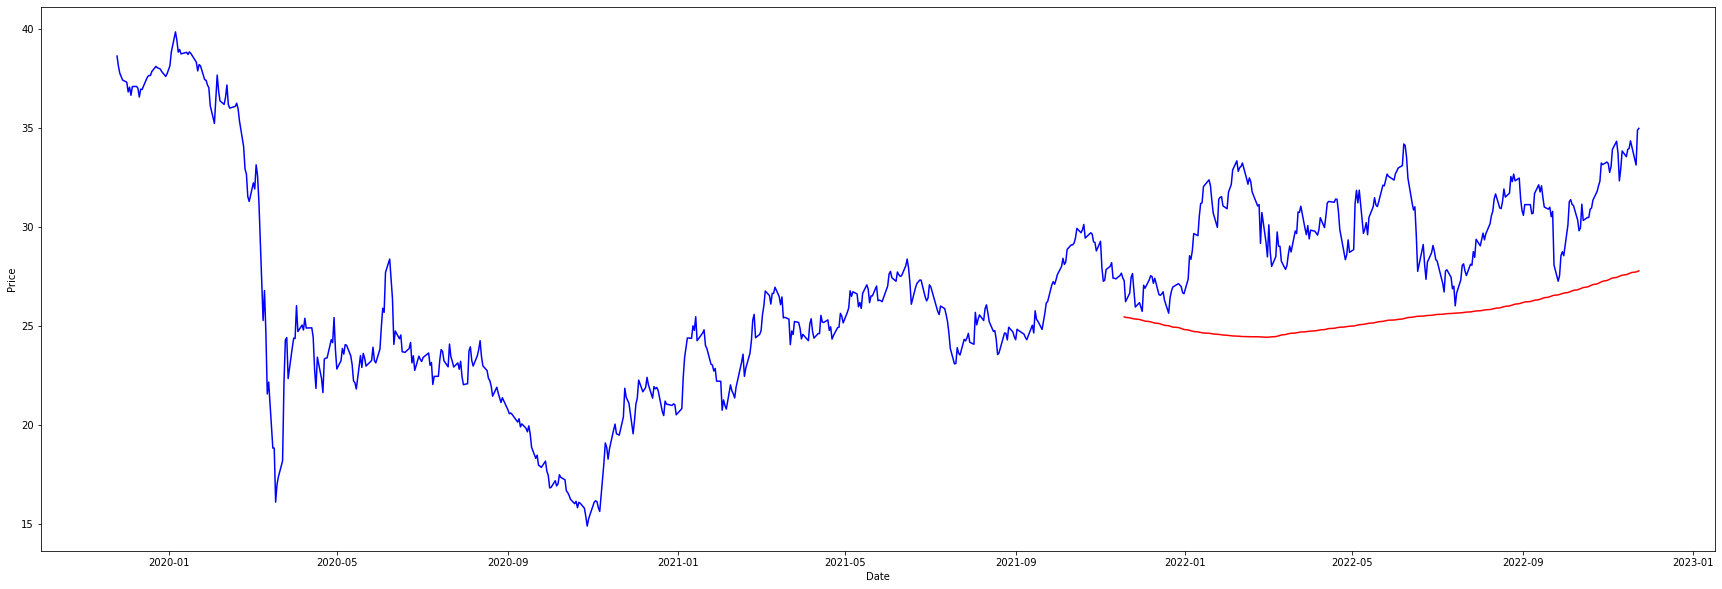

In [15]:
### Importing all the required Libraries
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

                                                                    ### Moving Average ###

# Reading the Dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/Datasets/BP.csv")
# Dropping the columns having undefined value.
df.dropna(inplace = True)
# Converting date to datetime format from string format.
df['Date'] = pd.to_datetime(df['Date'])
# Printing the Dataset.
# print(df)
# Dropping all the columns except Date and Close. 
new_df = df.drop(['Low', 'High', 'Volume', 'Open', 'Adj Close'], axis = 1, inplace = False)
# Deviding the Dataset into Train and Test Dataset.
train = new_df.iloc[:500]
test = new_df.iloc[500:]

predictions = test
sum = 0
for i in range(len(train)):
  sum += train.iat[i, 1]

# Setting the height and width of the plot to a required value.
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(new_df['Date'], new_df['Close'], color = 'b')

# Taking average of Last 500 elements.
for i in range(len(test)):
    sum += test.iat[i, 1]
    sum -= train.iat[i, 1]
    avg = sum/500
    predictions.iat[i,1] = avg

plt.plot(predictions['Date'], predictions['Close'], color = 'r')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


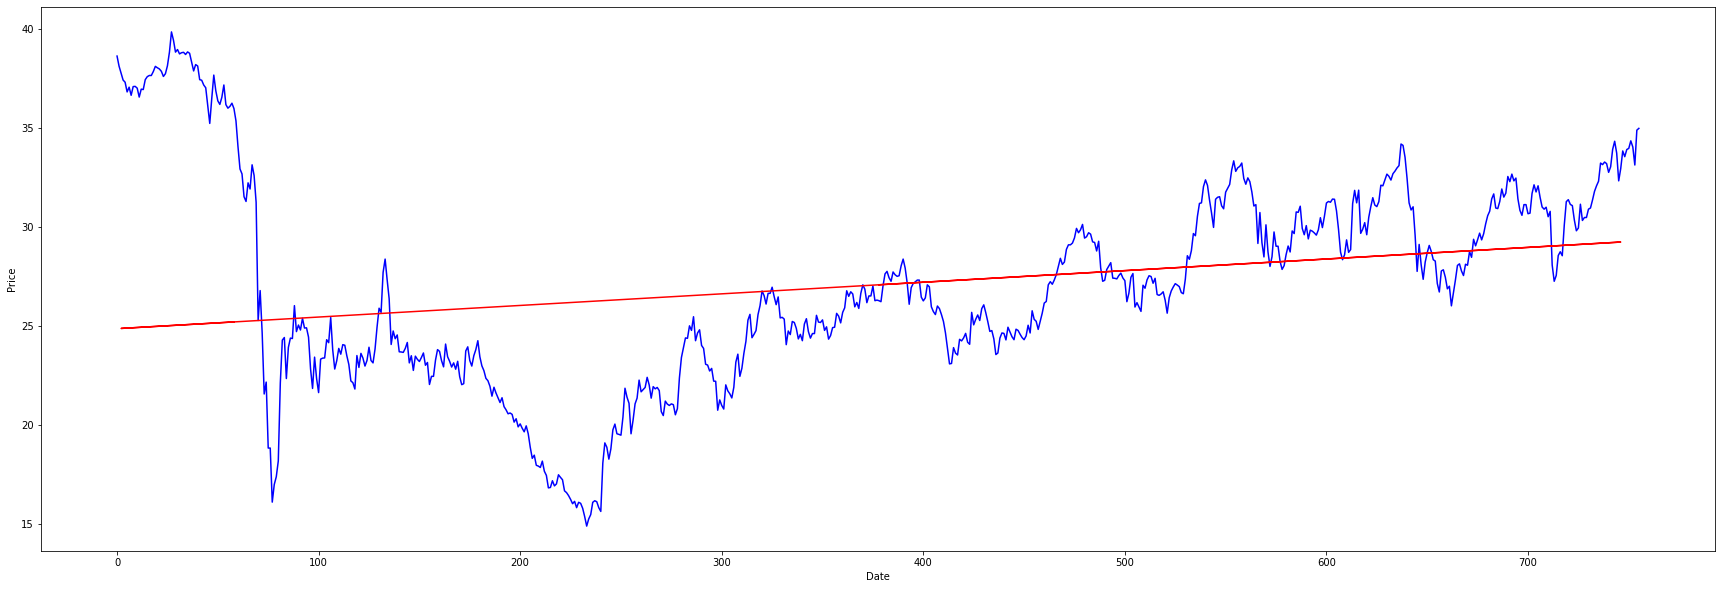

In [8]:
                                                                   ### Linear Regression ###

# Dropping all the columns except Date and Close. 
new_df = df.drop(['Low', 'High', 'Volume', 'Open', 'Adj Close'], axis = 1, inplace = False)
# Making the Date Columns as Float.
for i in range(len(new_df)):
  new_df.iat[i, 0] = float(i)

X = new_df[['Date']]
Y = new_df[['Close']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
x = new_df[['Date']]
y = new_df[['Close']]

# Splitting the dataset into train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
lr = LinearRegression()
lr.fit(x_train, y_train)
# Here the datatype must be float for pandas to work.
y_pred = lr.predict(x_test)   
# print(x_test, y_test)

# Setting the height and width of the plot to a required value.
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(X, Y, color = 'b')
plt.plot(x_test, y_pred, color = 'r')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


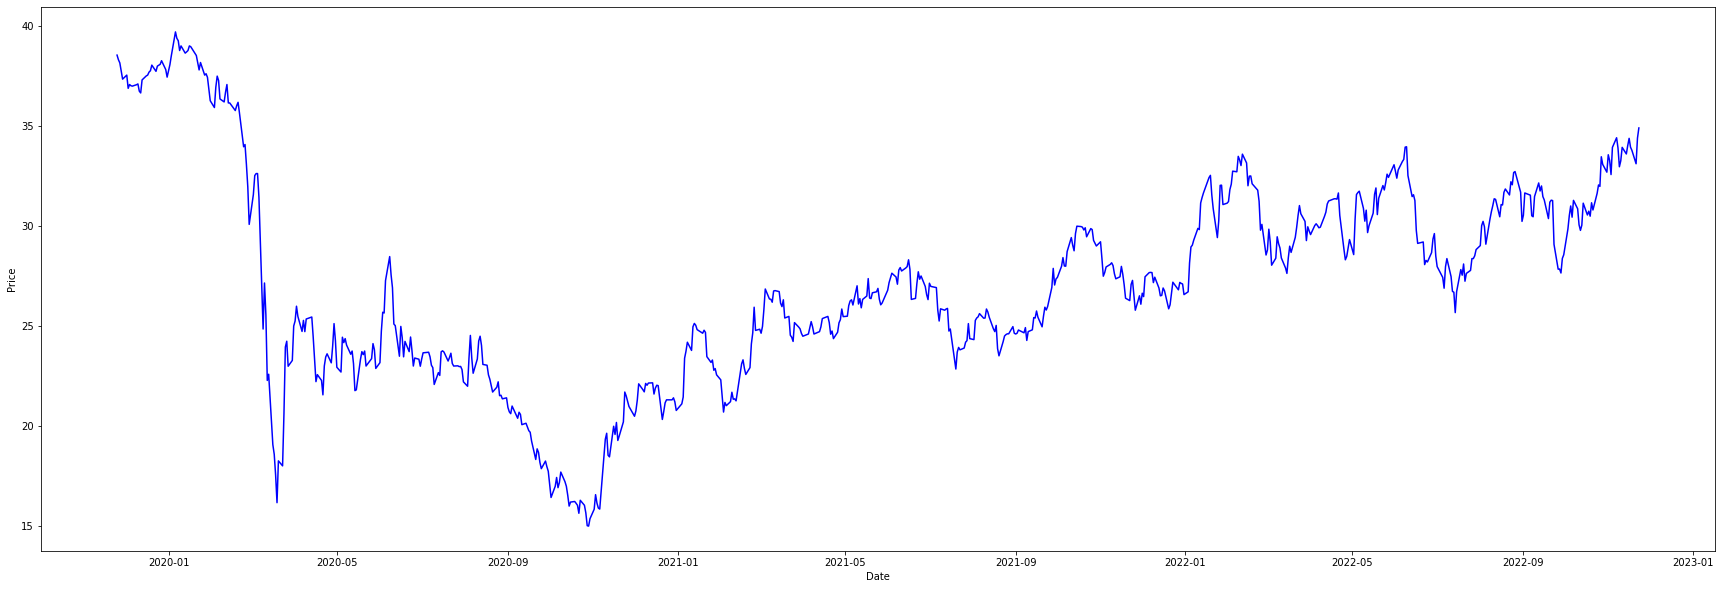

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi35c0e3g/jtnnbmqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi35c0e3g/_7lr_16e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72592', 'data', 'file=/tmp/tmpi35c0e3g/jtnnbmqv.json', 'init=/tmp/tmpi35c0e3g/_7lr_16e.json', 'output', 'file=/tmp/tmpi35c0e3g/prophet_model7ov65lsk/prophet_model-20221202170709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:07:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:07:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
                                                                        ### Prophet ###

# For Dropping all the columns except Date and Open.
new_df = df.drop(['Low', 'High', 'Volume', 'Open', 'Adj Close'], axis = 1, inplace = False)
new_df.columns = ['ds', 'y']

# Setting the height and width of the plot to a required value.
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(new_df['ds'], new_df['y'], color = 'b')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# model_params = {"daily_seasonality": False, "weekly_seasonality": False, "yearly_seasonality": True, "seasonality_mode": "multiplicative", "growth": "linear"}
# For including 1st to length - 200 th row.
train = new_df.iloc[:len(df) - 200]  
# For including length - 200 th to last row. 
test = new_df.iloc[len(df) - 200:] 
# Using Prophet Module.
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(365, freq='D')
forecast = m.predict(future)
plot_plotly(m, forecast)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



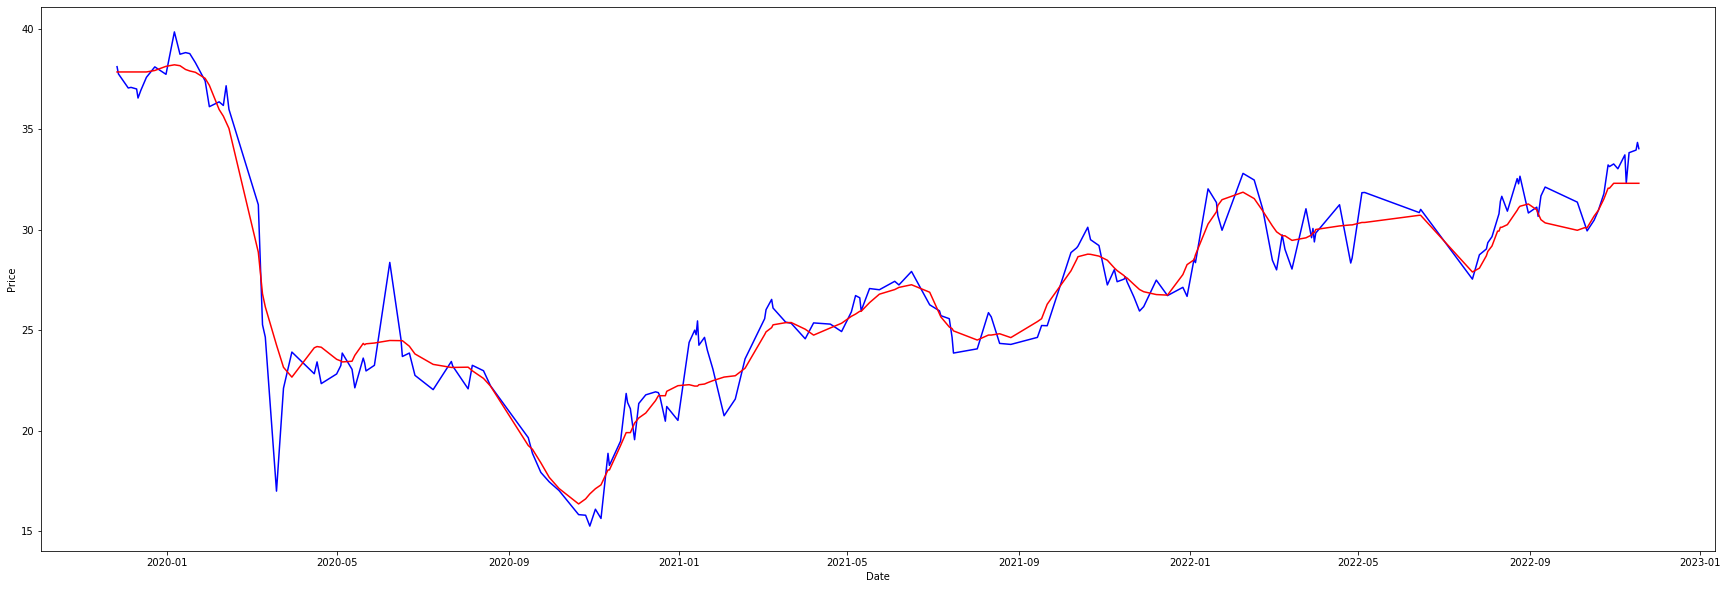

In [12]:
                                                                  ### K-Nearest Neighbours ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 20)

# Dropping all the columns except Date and Close. 
new_df = df.drop(['Low', 'High', 'Volume', 'Open', 'Adj Close'], axis = 1, inplace = False)
new_df = new_df.sample(frac = 1)

# For including 1st to length - 200 th row.
train = new_df.iloc[:len(df) - 200]  
# For including length - 200 th to last row. 
test = new_df.iloc[len(df) - 200:] 

# For sorting the dataset according to date.
train.sort_values(by = 'Date', inplace = True)
test.sort_values(by = 'Date', inplace = True)

x_train = train[['Date']]
y_train = train[['Close']]
x_test = test[['Date']]
y_test = test[['Close']]
knn.fit(x_train, y_train)
# Calculating the knn Score.
knn.score(x_test, y_test)
predictions = knn.predict(x_test)

# Setting the height and width of the plot to a required value.
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(x_test, y_test, color = 'b')
plt.plot(x_test, predictions, color = 'r')
plt.plot()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

(-2.2722138586469605, 0.18108618962633682, 0, 755, {'1%': -3.4390409569041207, '5%': -2.865375732701395, '10%': -2.568812543748081}, 1610.585327430905)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




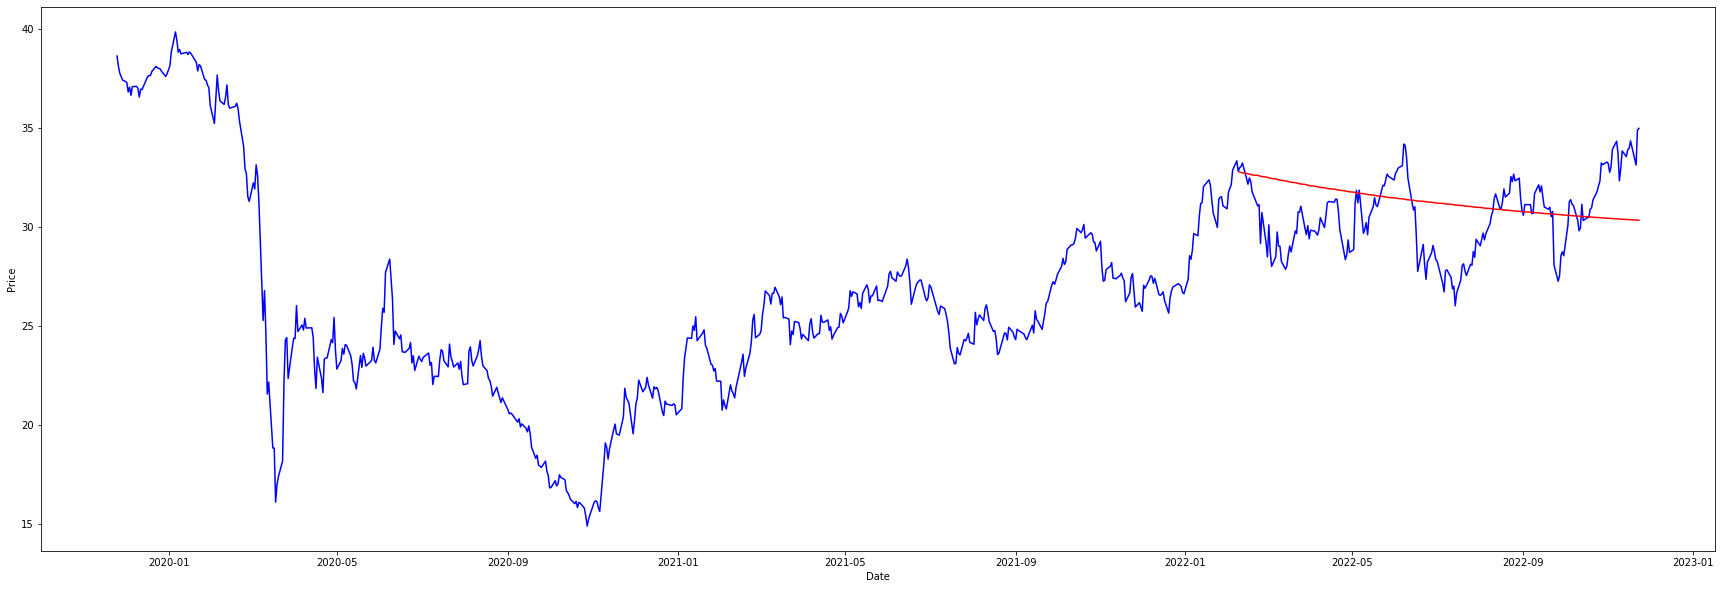

In [11]:
                                                                        ### ARIMA ###

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

new_df = df.drop(['Low', 'High', 'Volume', 'Open', 'Adj Close'], axis = 1, inplace = False)
# Dickey Fuller Test For Stationarity of Data.
test_result = adfuller(new_df['Close'])
print(test_result)

# For including 1st to length - 200 th row.
train = new_df.iloc[:len(df) - 200]  
# For including length - 200 th to last row. 
test = new_df.iloc[len(df) - 200:] 

# Storing lengths of Train and Test Dataset.
len_train = len(train)
len_test = len(test)
# Using ARIMA Model with order = (1, 0, 1)
model=ARIMA(train['Close'], order = (1, 0, 1))
model=model.fit()
# print(model.summary())
predictions = model.predict(len_train, len_train + len_test -1)
# print(predictions)

# Setting the height and width of the plot.
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(new_df['Date'], new_df['Close'], color = 'b')
plt.plot(test['Date'], predictions, color = 'r')
plt.plot()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()